In [1]:
%matplotlib inline
import json
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys, os

sys.path.append('C:\\Users\\kjree\\Workspaces\\ml-fantasy-football-model\\src\\model_constants')

from FantasyFootballConstants import FantasyFootballConstants as ffc

"""
Method to return a fantasy point calculation based on past career stats
"""
def calcPastFantasyPointValue(career, year):
    result = 0
    for season in career:
        parsedDate = dateutil.parser.parse(season['date'])
        #filter for the given season year
        #ex. the 2017 year is the 2017-2018 season
        if (parsedDate.month >=8 and parsedDate.month <=12 and parsedDate.year == year) or \
           (parsedDate.month >=1 and parsedDate.month <=2 and parsedDate.year == year + 1):
             #points from Passing
             pointsFromPassYds = calcOffensiveFantasyValueByYards(season[ffc.STATS_KEY_OFF_PASS_YDS],ffc.STATS_VAL_OFF_PASS_YDS)
             result = result + pointsFromPassYds
             pointsFromPassTDs = calcOffensiveFantasyValueByTDs(season[ffc.STATS_KEY_OFF_PASS_TD],ffc.STATS_VAL_OFF_PASS_TD)
             result = result + pointsFromPassTDs
             pointsFromPassInts = calcOffensiveFantasyValueByInts(season[ffc.STATS_KEY_OFF_PASS_INT],ffc.STATS_VAL_OFF_PASS_INT)
             result = result + pointsFromPassInts
             
             #points from Rushing
             pointsFromRushYds = calcOffensiveFantasyValueByYards(season[ffc.STATS_KEY_OFF_RUSH_YDS],ffc.STATS_VAL_OFF_RUSH_YDS)
             result = result + pointsFromRushYds
             pointsFromRushTDs = calcOffensiveFantasyValueByTDs(season[ffc.STATS_KEY_OFF_RUSH_TD],ffc.STATS_VAL_OFF_RUSH_TD)
             result = result + pointsFromRushTDs

             #points from Receiving
             pointsFromRecvYds = calcOffensiveFantasyValueByYards(season[ffc.STATS_KEY_OFF_RECV_YDS],ffc.STATS_VAL_OFF_RECV_YDS)
             result = result + pointsFromRecvYds
             pointsFromRecvTDs = calcOffensiveFantasyValueByTDs(season[ffc.STATS_KEY_OFF_RECV_TD],ffc.STATS_VAL_OFF_RECV_TD)
             result = result + pointsFromRecvTDs

             #points from Kick Returns
             pointsFromKickReturnYds = calcOffensiveFantasyValueByYards(season[ffc.STATS_KEY_OFF_RTRN_YDS],ffc.STATS_VAL_OFF_RTRN_YDS)
             result = result + pointsFromKickReturnYds
             pointsFromKickReturnTDs = calcOffensiveFantasyValueByTDs(season[ffc.STATS_KEY_OFF_RTRN_TD],ffc.STATS_VAL_OFF_RTRN_TD)
             result = result + pointsFromKickReturnTDs
    return result

In [15]:
"""
Method to return fantasy point calculations for a player's entire career.
A career is a list of games.  This function returns a numpy array with an element
for every season in the player's career.
"""
def calcCareerFantasyPointValues(career):
    seasons = list()
    firstyear = -1
    lastyear = -1
    for game in career:
        parsedDate = dateutil.parser.parse(game['date'])
        if firstyear == -1 or lastyear == -1:
            firstyear = int(parsedDate.year)
            lastyear = int(parsedDate.year)
        else:
            if int(parsedDate.year) < firstyear:
                firstyear = int(parsedDate.year)
            if int(parsedDate.year) > lastyear:
                lastyear = int(parsedDate.year)

    if firstyear == -1 or lastyear == -1:
        return None

    #if(firstyear >= 1990):
    print("seasons played", (lastyear + 1) - firstyear)

    for year in range(firstyear, lastyear+1, 1):
        fantasyValueForYear = calcPastFantasyPointValue(career, year)
        seasons.append(fantasyValueForYear)

    return seasons

In [16]:
"""
Method to return a fantasy point calculation based on pass, rush, or recv yards
"""
def calcOffensiveFantasyValueByYards(yards, chart):
     result = 0
     rules = chart.split(",")
     for i in range(0,len(rules)):
          data = rules[i].split(":")
          threshold = int(data[0])
          value = int(data[1])
          if(yards < threshold and i == 0):
               result = 0
               return result
          elif(yards < threshold and i > 0):
               result = int(rules[i-1].split(":")[1])
               return result
          elif(yards == threshold):
               result = value
               return result
     return result

In [17]:
"""
Method to return a fantasy point calculation based on any offensive TD.
By default 6 pts are awarded per TD no matter how the TD is scored.
"""
def calcOffensiveFantasyValueByTDs(tds, tdvalue):
     return tds * tdvalue

In [18]:
"""
Method to return a fantasy point calculation for intercepted passes.
This intvalue is often a negative number.
"""
def calcOffensiveFantasyValueByInts(ints, intvalue):
     return ints * intvalue

In [19]:
rbCareerDict = dict()
rbStatDict = dict()
rbSeasonsList = list()
rbStatDf = pd.DataFrame()

#1. Get the game stats for each RB for every year they have played
with open('C:\\Users\\kjree\\Workspaces\\nfl-player-stats\\games_RB.json') as gf:
    games = json.load(gf)
    for game in games:
        playerid = game['player_id']
        if rbCareerDict.get(playerid) is not None:
            rbCareerDict[playerid].append(game)
        else:
            rbCareerDict[playerid] = []

#2. Loop through RB player_id's and calculate fantasy values
#3. Record the number of seasons played for lifespan study of the RB position
for key in rbCareerDict.keys():
    career = rbCareerDict[key]
    if career is not None and len(career) > 0:
        seasons = calcCareerFantasyPointValues(career)
        if(len(seasons) > 0):
            rbStatDict[key] = seasons
            rbSeasonsList.append(len(seasons))

seasons played 1
seasons played 2
seasons played 3
seasons played 5
seasons played 2
seasons played 2
seasons played 5
seasons played 3
seasons played 1
seasons played 9
seasons played 6
seasons played 7
seasons played 5
seasons played 4
seasons played 7
seasons played 4
seasons played 1
seasons played 4
seasons played 6
seasons played 17
seasons played 1
seasons played 5
seasons played 6
seasons played 1
seasons played 3
seasons played 3
seasons played 3
seasons played 6
seasons played 1
seasons played 7
seasons played 1
seasons played 2
seasons played 1
seasons played 5
seasons played 12
seasons played 1
seasons played 4
seasons played 4
seasons played 4
seasons played 2
seasons played 7
seasons played 2
seasons played 8
seasons played 5
seasons played 6
seasons played 6
seasons played 2
seasons played 8
seasons played 2
seasons played 6
seasons played 3
seasons played 1
seasons played 7
seasons played 1
seasons played 1
seasons played 10
seasons played 12
seasons played 8
seasons pl

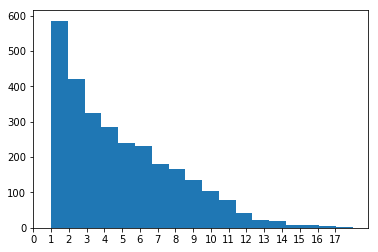

In [23]:
#4. Perform lifespan study for the RB position; then comment this out.
plt.hist(rbSeasonsList, bins=18)
plt.xticks(np.arange(0, 18, step=1))
plt.show()

#5. Calculate the prime age curve for the RB position
#rbStatDfNoFill = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in rbStatDict.items()]))
#rbStatDfWithFill = rbStatDfNoFill.fillna(0)
#rbStatDfWithFill['averageWithFill'] = rbStatDfWithFill.mean(axis=1)
#rbStatDfWithFill['averageNoFill'] = rbStatDfNoFill.mean(axis=1)
#rbStatDfWithFill['averageOverall'] = (rbStatDfWithFill['averageWithFill'] + rbStatDfWithFill['averageNoFill']) / 2
#rbStatDfWithFill.to_csv("C:\\Users\\kjree\\Workspaces\\ml-fantasy-football-model\\rb_fantasy_values.csv", index=False, encoding='utf8')
#p7 = np.poly1d(np.polyfit(rbStatDfWithFill.index, rbStatDfWithFill['averageOverall'], 7))
#xp = np.linspace(0,27,100)
#plt.scatter(rbStatDfWithFill.index, rbStatDfWithFill['averageOverall'])
#plt.plot(xp, p7(xp), c='r')
#plt.show()

#6. Aspect B of the NFL Player Model:
# Group all RB's into top 0-20%,21-40%,41-60%,61-80%, and 81-100% based on last year's fantasy values
#rbLastYearStatDict = dict()
#for key in rbCareerDict.keys():
#    career = rbCareerDict[key]
#    if career is not None and len(career) > 0:
#        lastYear = calcPastFantasyPointValue(career, 2017)
#        if lastYear is not None:
#            rbLastYearStatDict[key] = lastYear

In [48]:
#from sklearn.metrics import r2_score

#r2 = r2_score(rbStatDfWithFill['averageOverall'], p7(rbStatDfWithFill.index))

#print(r2)

0.98586056587
